In [1]:
import matplotlib.pyplot as plt
from pmd_beamphysics import ParticleGroup
import numpy as np
from pmd_beamphysics.units import mec2

In [2]:
from eblt.run import EBLT
import os


In [3]:
test = EBLT(input = "example1/eblt.in", workdir = os.environ.get('SCRATCH'), command = '/sdf/group/ad/sw/beta/bin/xeblt')

In [4]:
output = test.run()

<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

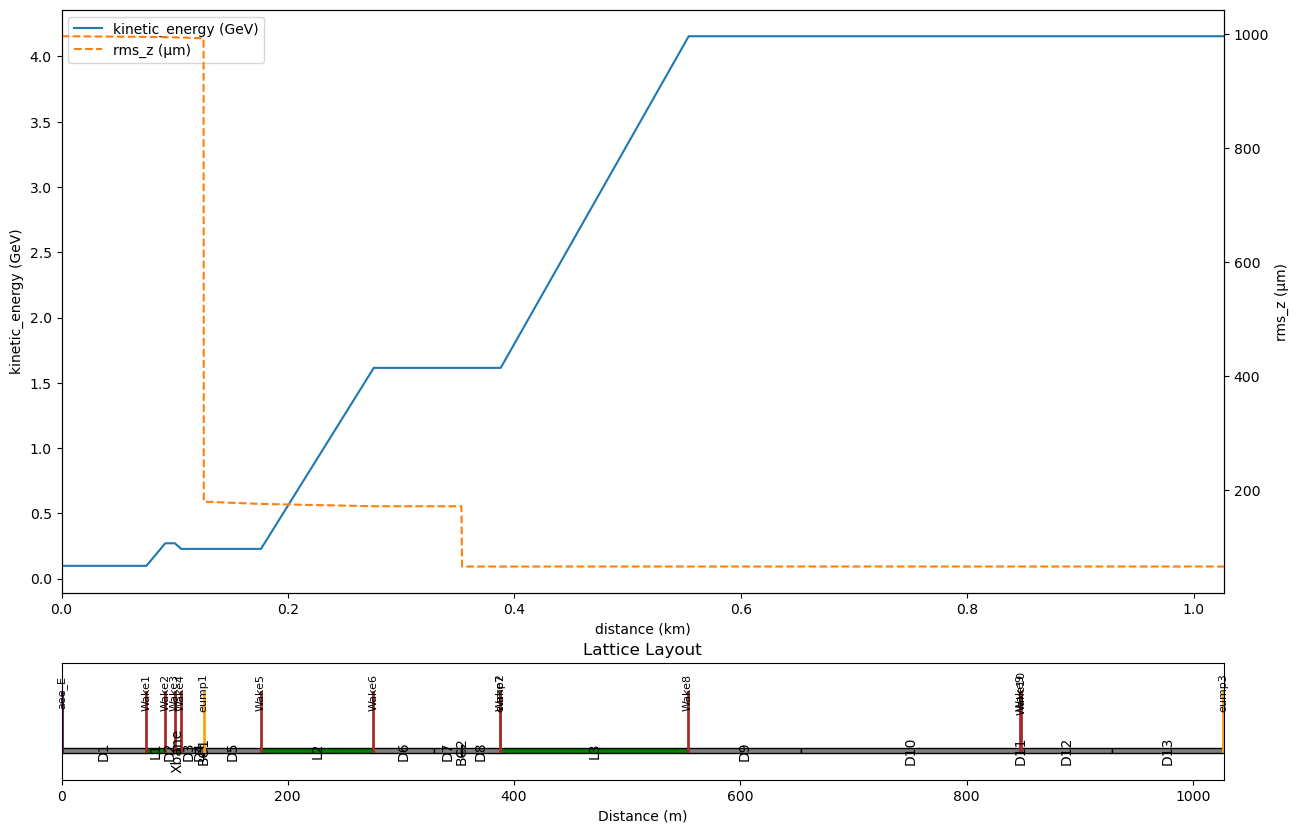

In [5]:
test.plot()

In [6]:
particles = test.output.particle_distributions
print(particles.keys())

dict_keys([221, 101, 213, 211, 201])


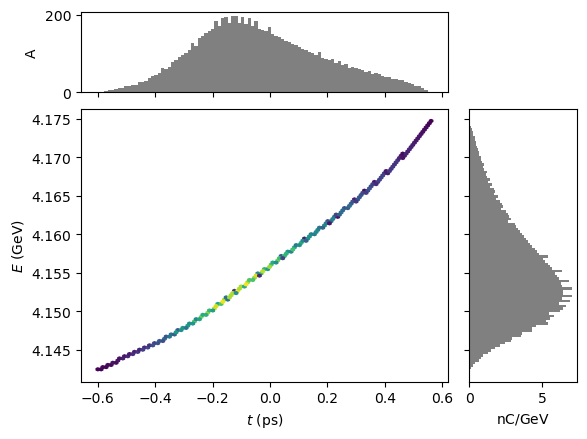

In [7]:
test.output.plot_distribution(file_id = 201, xkey = 't', ykey = 'energy', bins = 100)

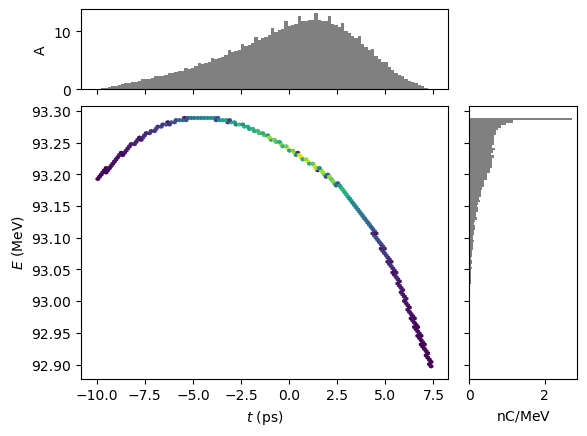

In [8]:
test.output.plot_distribution(file_id = 101, xkey = 't', ykey = 'energy', bins = 100)

In [9]:
test.archive('./archivefile.h5')

In [10]:
test.load_archive('./archivefile.h5')

In [11]:
from distgen import Generator

In [12]:
G = Generator('./example1/image.in.yaml')

In [13]:
G.run()

<ParticleGroup with 100000 particles at 0x7f299bef8cb0>

In [14]:
Pg = G.particles

In [15]:
Pg.t = Pg.z/3e8

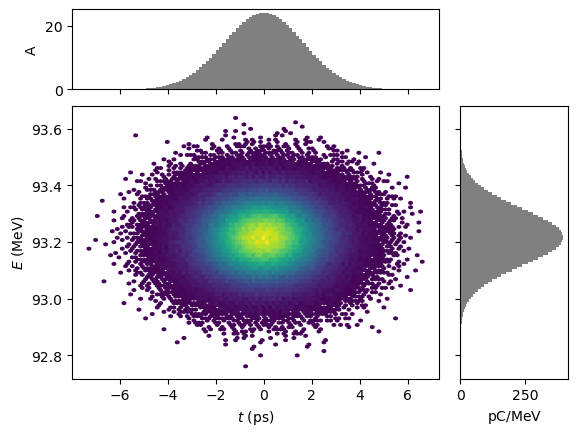

In [16]:
Pg.plot('t', 'energy', bins = 100)

In [17]:
test.initial_particles = Pg

In [18]:
output = test.run()

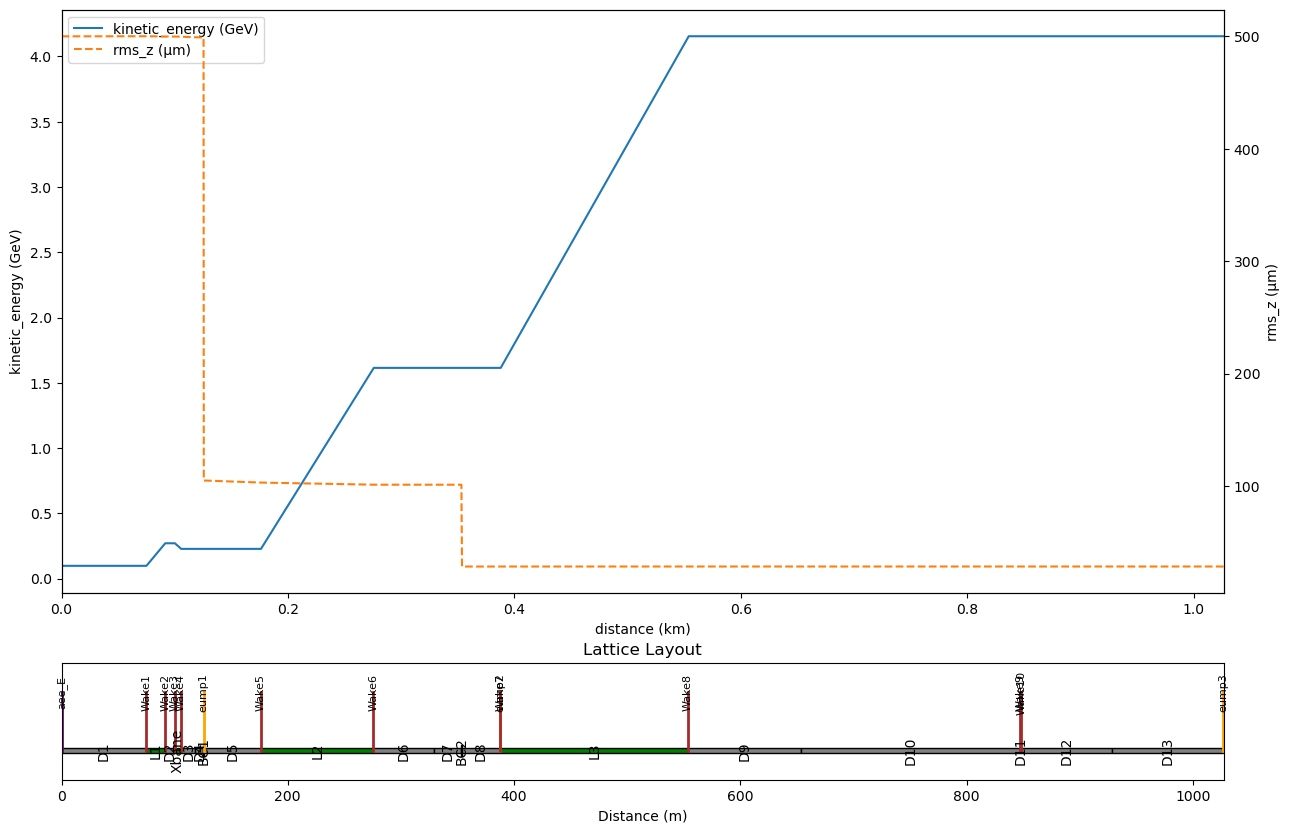

In [19]:
test.plot()

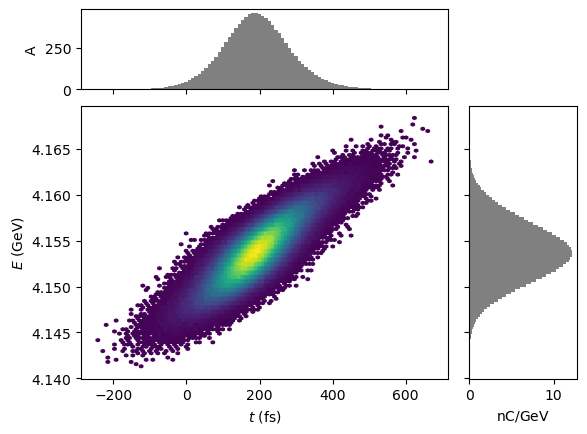

In [21]:
test.output.plot_distribution(file_id = 201, xkey = 't', ykey = 'energy', bins = 100)